<a href="https://colab.research.google.com/github/pande17827/Pydantic-Data-Validation-in-Python/blob/main/two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u><i> Filed Validator

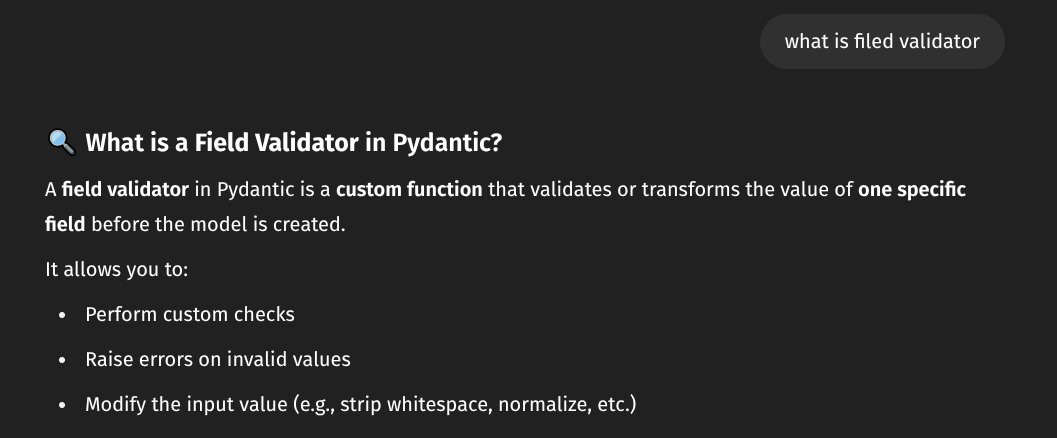

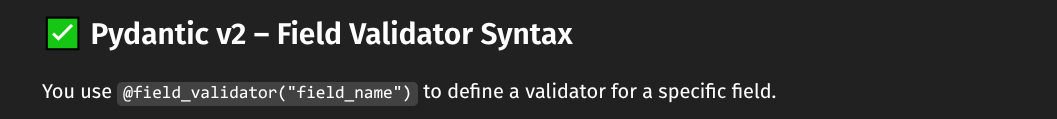

### <i>Usecase1:- for validating data

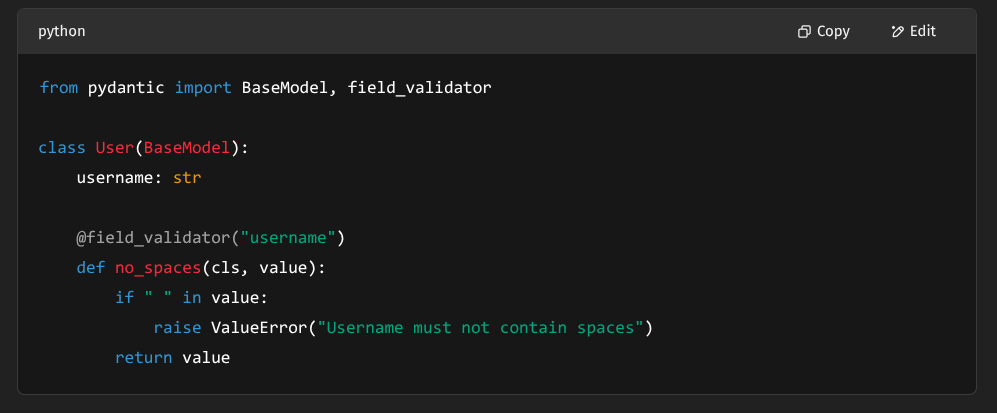

In [18]:
# we will check whether an email is realted to the bank or not by checking whether it end with something like this hdfc.com
from pydantic import BaseModel,EmailStr,AnyUrl,Field,field_validator
from typing import List,Dict,Annotated,Optional

class Patient(BaseModel):
  name:str
  email:EmailStr
  age:int
  weight:float
  married:bool
  allergies:List[str]
  contact_details:Dict[str,str]

  # applying filedValidator
  @field_validator('email')
  @classmethod
  def email_validator(cls,value):
    valid_domain=['hdfc.com','icici.com']
    #abc@gmail.com
    domain_name=value.split('@')[-1]

    if domain_name not in valid_domain:
      raise ValueError('not a valid domain')
    return value

patient_info={
    'name':'vikas',
    'email':'pande.17827@gmail.com',
    'age':'30',
    'weight':75.2,
    'married':'True',
    'allergies':['poolen','dust'],
    'contact_details':{
        'phone':'8810620696'
    }
}

patient1=Patient(**patient_info)


def update_patient_data(patient:Patient):
  print(patient.name)
  print(patient.email)
  print(patient.age)
  print(patient.weight)
  print(patient.married)
  print(patient.allergies)
  print(patient.contact_details)
  print('updated')

update_patient_data(patient1)







ValidationError: 1 validation error for Patient
email
  Value error, not a valid domain [type=value_error, input_value='pande.17827@gmail.com', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/value_error

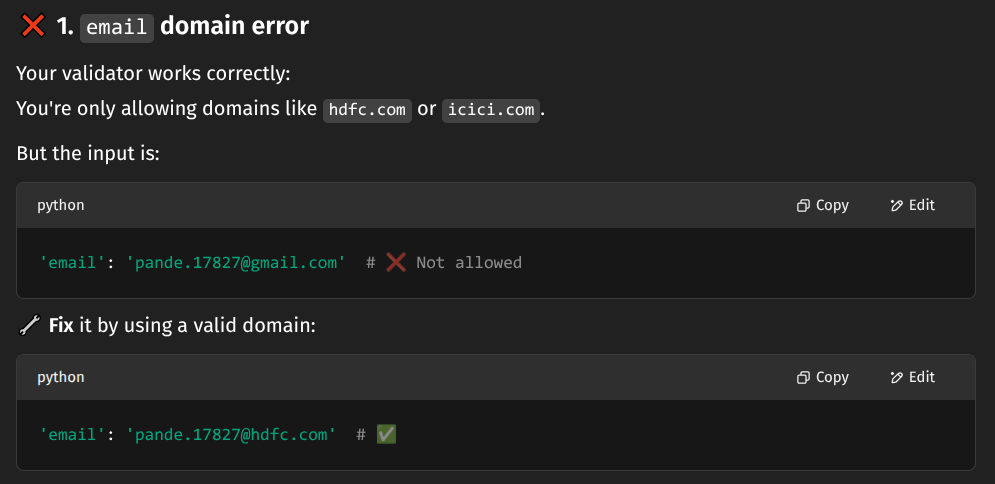

In [19]:
# we will check whether an email is realted to the bank or not by checking whether it end with something like this hdfc.com
from pydantic import BaseModel,EmailStr,AnyUrl,Field,field_validator
from typing import List,Dict,Annotated,Optional

class Patient(BaseModel):
  name:str
  email:EmailStr
  age:int
  weight:float
  married:bool
  allergies:List[str]
  contact_details:Dict[str,str]

  # applying filedValidator
  @field_validator('email')
  @classmethod
  def email_validator(cls,value):
    valid_domain=['hdfc.com','icici.com']
    #abc@gmail.com
    domain_name=value.split('@')[-1]

    if domain_name not in valid_domain:
      raise ValueError('not a valid domain')
    return value

patient_info={
    'name':'vikas',
    'email':'pande.17827@hdfc.com',
    'age':'30',
    'weight':75.2,
    'married':'True',
    'allergies':['poolen','dust'],
    'contact_details':{
        'phone':'8810620696'
    }
}

patient1=Patient(**patient_info)


def update_patient_data(patient:Patient):
  print(patient.name)
  print(patient.email)
  print(patient.age)
  print(patient.weight)
  print(patient.married)
  print(patient.allergies)
  print(patient.contact_details)
  print('updated')

update_patient_data(patient1)







vikas
pande.17827@hdfc.com
30
75.2
True
['poolen', 'dust']
{'phone': '8810620696'}
updated


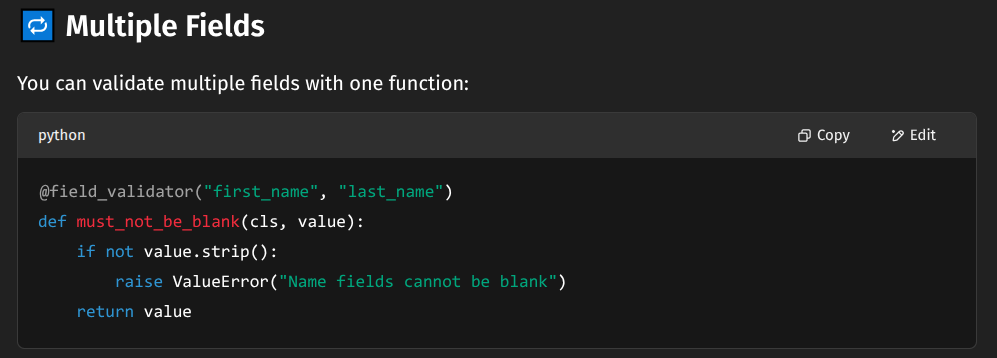

### <i>Usecase2:- for  transforming  data


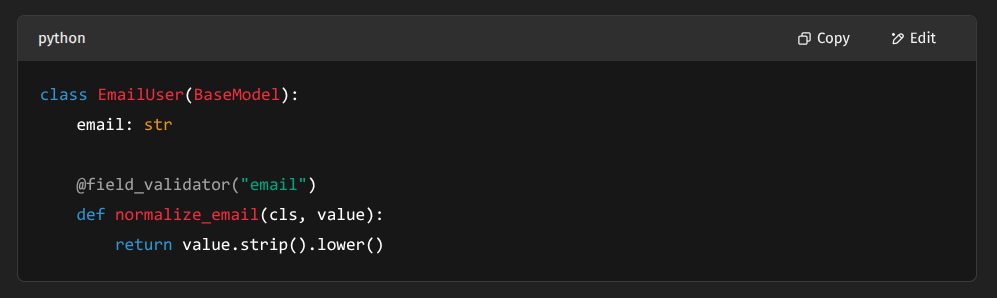

In [21]:
# we will check whether an email is realted to the bank or not by checking whether it end with something like this hdfc.com
from pydantic import BaseModel,EmailStr,AnyUrl,Field,field_validator
from typing import List,Dict,Annotated,Optional

class Patient(BaseModel):
  name:str
  email:EmailStr
  age:int
  weight:float
  married:bool
  allergies:List[str]
  contact_details:Dict[str,str]

  # applying filedValidator
  @field_validator('email')
  @classmethod
  def email_validator(cls,value):
    valid_domain=['hdfc.com','icici.com']
    #abc@gmail.com
    domain_name=value.split('@')[-1]

    if domain_name not in valid_domain:
      raise ValueError('not a valid domain')
    return value


  @field_validator('name')
  @classmethod
  def transform_name(cls,value):
    return value.upper()



patient_info={
    'name':'vikas',
    'email':'pande.17827@hdfc.com',
    'age':'30',
    'weight':75.2,
    'married':'True',
    'allergies':['poolen','dust'],
    'contact_details':{
        'phone':'8810620696'
    }
}

patient1=Patient(**patient_info)


def update_patient_data(patient:Patient):
  print(patient.name)
  print(patient.email)
  print(patient.age)
  print(patient.weight)
  print(patient.married)
  print(patient.allergies)
  print(patient.contact_details)
  print('updated')

update_patient_data(patient1)







VIKAS
pande.17827@hdfc.com
30
75.2
True
['poolen', 'dust']
{'phone': '8810620696'}
updated


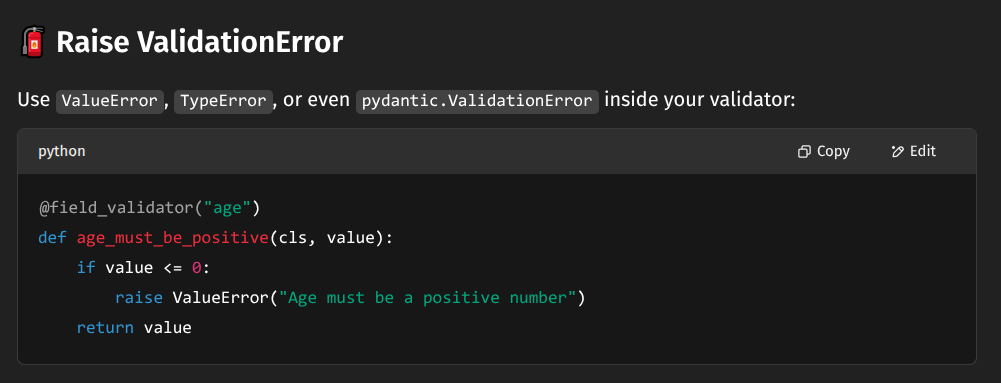

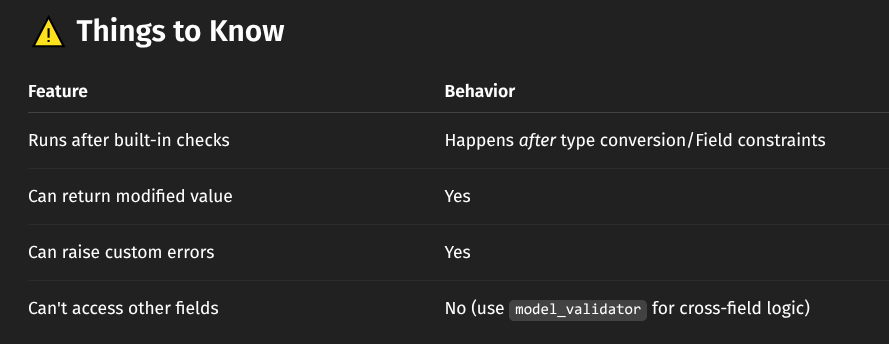

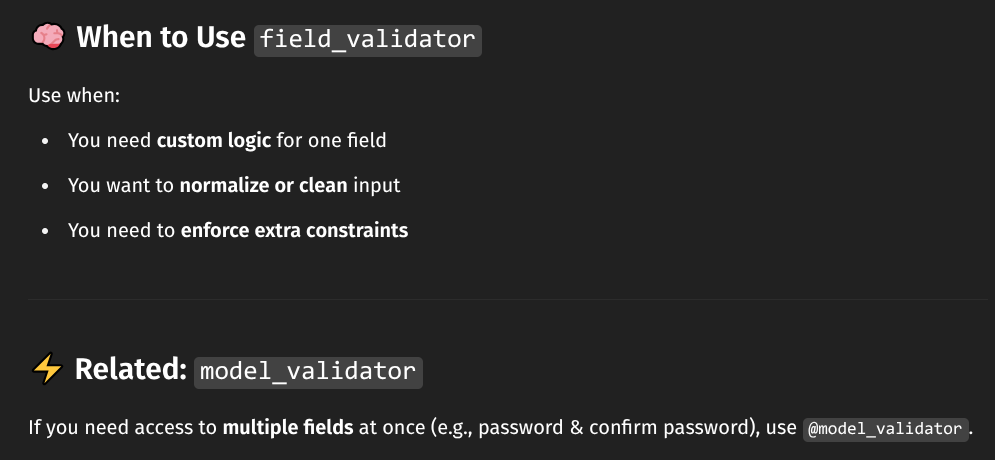

# <b><i> Different Types of mode in FiledValidator

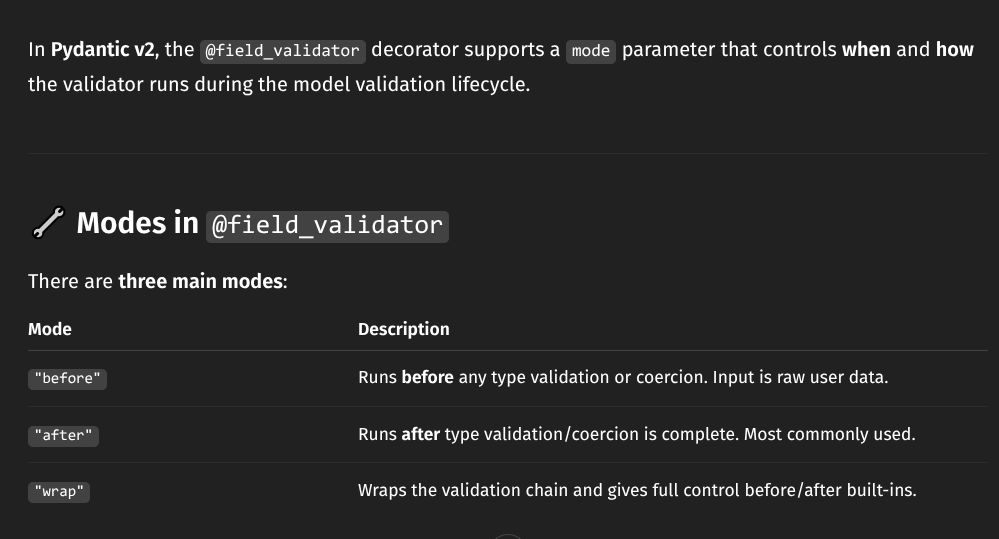

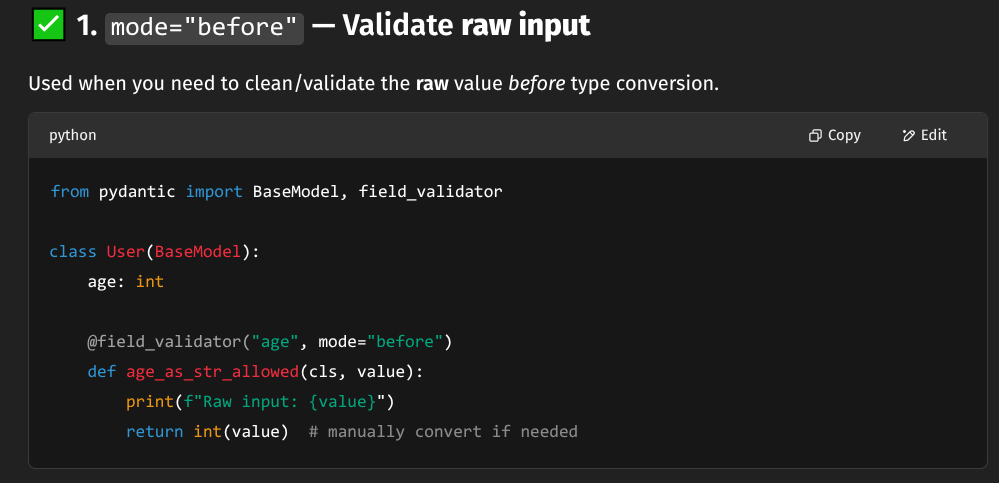

In [22]:
# we will check whether the age lies btw 0 and 100 using filed_validator
from pydantic import BaseModel,EmailStr,AnyUrl,Field,field_validator
from typing import List,Dict,Annotated,Optional

class Patient(BaseModel):
  name:str
  email:EmailStr
  age:int
  weight:float
  married:bool
  allergies:List[str]
  contact_details:Dict[str,str]

  # applying filedValidator
  @field_validator('email')
  @classmethod
  def email_validator(cls,value):
    valid_domain=['hdfc.com','icici.com']
    #abc@gmail.com
    domain_name=value.split('@')[-1]

    if domain_name not in valid_domain:
      raise ValueError('not a valid domain')
    return value


  @field_validator('name')
  @classmethod
  def transform_name(cls,value):
    return value.upper()


  @field_validator('age',mode='before')
  @classmethod
  def validate_age(cls,value):
    if 0<value<100:
      return value
    else:
      raise ValueError('age should be btw 0 and 100')



patient_info={
    'name':'vikas',
    'email':'pande.17827@hdfc.com',
    'age':'30',
    'weight':75.2,
    'married':'True',
    'allergies':['poolen','dust'],
    'contact_details':{
        'phone':'8810620696'
    }
}

patient1=Patient(**patient_info)


def update_patient_data(patient:Patient):
  print(patient.name)
  print(patient.email)
  print(patient.age)
  print(patient.weight)
  print(patient.married)
  print(patient.allergies)
  print(patient.contact_details)
  print('updated')

update_patient_data(patient1)







TypeError: '<' not supported between instances of 'int' and 'str'

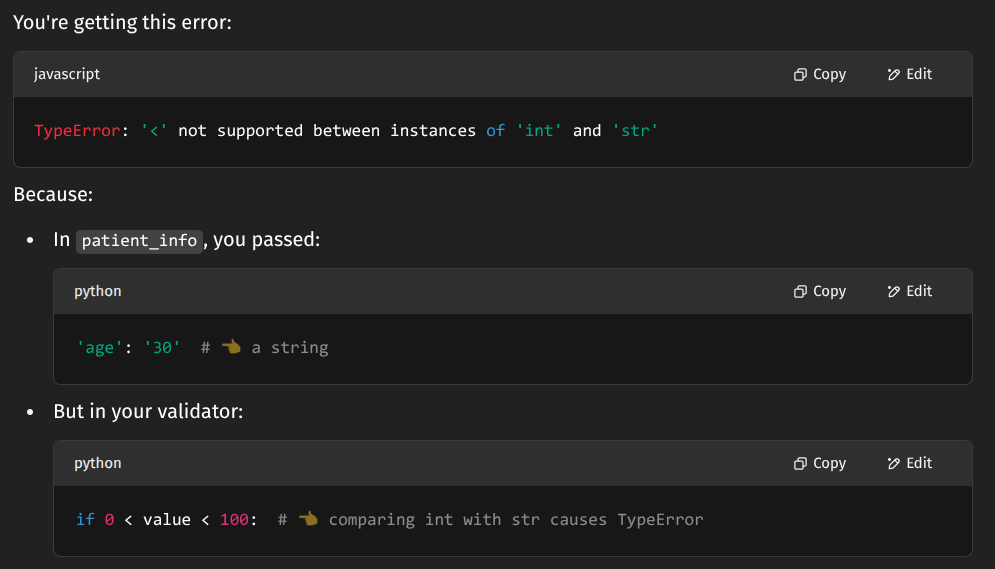

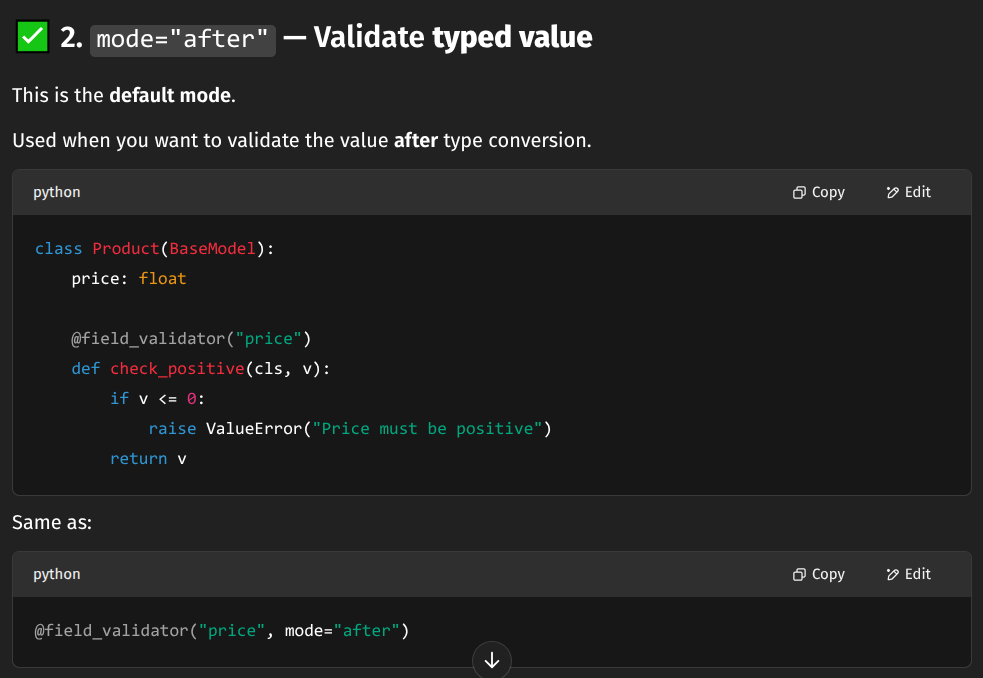

In [24]:
# we will check whether the age lies btw 0 and 100 using filed_validator
from pydantic import BaseModel,EmailStr,AnyUrl,Field,field_validator
from typing import List,Dict,Annotated,Optional

class Patient(BaseModel):
  name:str
  email:EmailStr
  age:int
  weight:float
  married:bool
  allergies:List[str]
  contact_details:Dict[str,str]

  # applying filedValidator
  @field_validator('email')
  @classmethod
  def email_validator(cls,value):
    valid_domain=['hdfc.com','icici.com']
    #abc@gmail.com
    domain_name=value.split('@')[-1]

    if domain_name not in valid_domain:
      raise ValueError('not a valid domain')
    return value


  @field_validator('name')
  @classmethod
  def transform_name(cls,value):
    return value.upper()


  @field_validator('age',mode='after')
  @classmethod
  def validate_age(cls,value):
    if 0<value<100:
      return value
    else:
      raise ValueError('age should be btw 0 and 100')



patient_info={
    'name':'vikas',
    'email':'pande.17827@hdfc.com',
    'age':'30',
    'weight':75.2,
    'married':'True',
    'allergies':['poolen','dust'],
    'contact_details':{
        'phone':'8810620696'
    }
}

patient1=Patient(**patient_info)


def update_patient_data(patient:Patient):
  print(patient.name)
  print(patient.email)
  print(patient.age)
  print(patient.weight)
  print(patient.married)
  print(patient.allergies)
  print(patient.contact_details)
  print('updated')

update_patient_data(patient1)







VIKAS
pande.17827@hdfc.com
30
75.2
True
['poolen', 'dust']
{'phone': '8810620696'}
updated


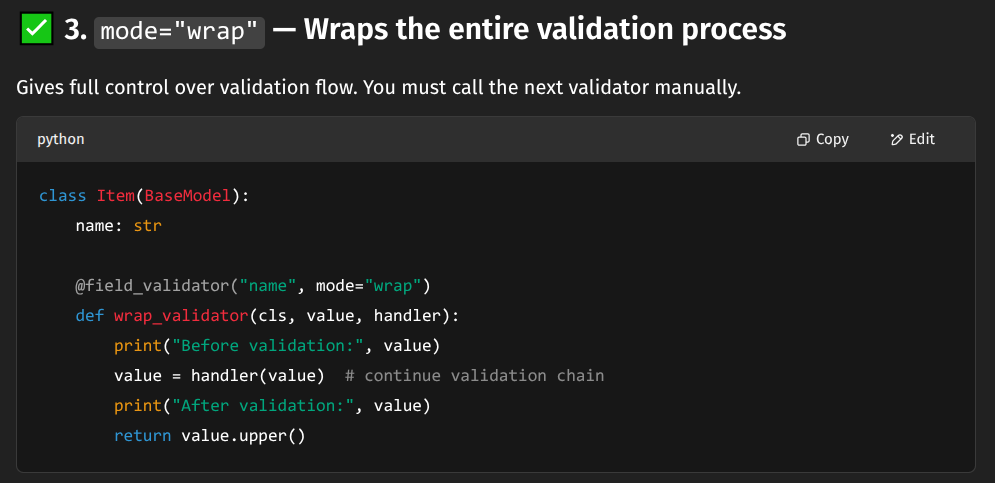

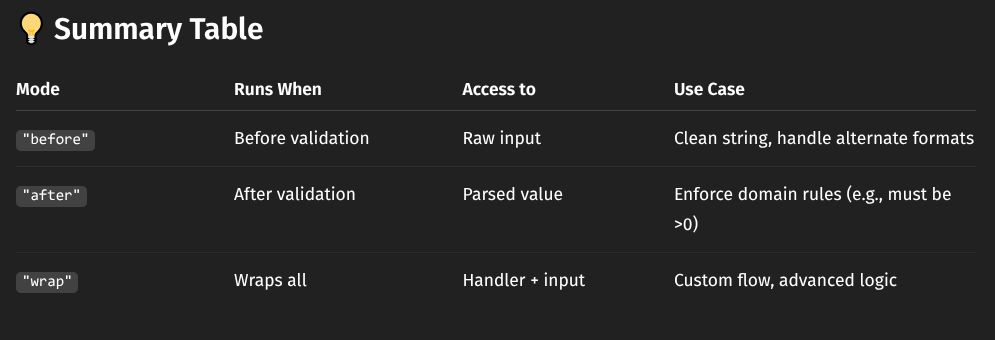